Mean Squared Error (MSE): 3.623357585665317
R-squared (R^2) Value: 0.9955352479177906


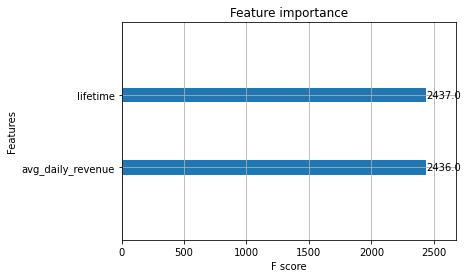

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

n_users = 10000

activity_prob = 0.03
active_users = np.random.choice(np.arange(1, n_users + 1), size=int(n_users * activity_prob), replace=False)

user_df = pd.DataFrame({'user_id': np.arange(1, n_users + 1)})
user_df['is_active'] = user_df['user_id'].isin(active_users)
user_df['registration_date'] = pd.date_range(start='2020-01-01', periods=n_users, freq='D')
user_df['last_activity_date'] = pd.NaT
user_df.loc[user_df['is_active'], 'last_activity_date'] = pd.date_range(start='2020-01-01', periods=len(active_users), freq='D')

user_df['revenue'] = np.random.randint(1, 100, size=n_users)

user_df['lifetime'] = np.random.randint(1, 365, size=n_users)

user_df['avg_daily_revenue'] = user_df['revenue'] / user_df['lifetime']

user_df['LTV'] = user_df.apply(lambda row: row['avg_daily_revenue'] * row['lifetime'], axis=1)

X = user_df[['lifetime', 'avg_daily_revenue']]
y = user_df['LTV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2) Value: {r2}")

xgb.plot_importance(model)
plt.show()